## Exploring Price Data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Importing Price Data of S&P500 firms from Yahoo Finance
df_prices = pd.read_excel("SP500_Price_Data.xlsx")
df_prices.head()

,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2012-01-03 16:00:00,83.49,27.14,35.00,18.25,52.95,12.20,28.57,5.48,69.10,...,102.78,113.97,27.34,32.44,25.14,42.12,35.72,53.94,16.77,31.01
1,2012-01-04 16:00:00,84.18,27.03,35.32,18.11,52.93,12.11,28.28,5.46,70.72,...,102.20,112.01,27.16,32.10,25.97,42.40,35.45,53.21,17.14,31.02
2,2012-01-05 16:00:00,83.80,26.97,33.36,18.27,51.92,12.11,28.48,5.46,71.17,...,103.97,110.84,27.28,32.38,25.60,42.73,35.40,53.84,17.62,31.04
3,2012-01-06 16:00:00,83.37,26.73,33.80,18.14,51.83,12.24,28.72,5.43,71.50,...,103.10,106.94,27.20,32.17,25.17,43.04,35.11,53.98,17.64,31.03
4,2012-01-09 16:00:00,83.87,26.72,33.00,18.21,51.74,12.20,28.53,5.59,71.48,...,102.22,106.64,27.22,32.87,25.27,42.87,34.95,54.38,17.88,32.00


We have the close prices for all the stocks in the S&P500. There are 505 columns besides the date due to some stocks having more than one ticker, as they have multiple classes of stock.

In [2]:
# Setting Date column as index
df_prices["Date"] = pd.to_datetime(df_prices["Date"])
df_prices.set_index("Date", inplace = True)

In [3]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2367 entries, 2012-01-03 16:00:00 to 2021-05-28 16:00:00
Columns: 505 entries, MMM to ZTS
dtypes: float64(505)
memory usage: 9.1 MB


This price data was extracted with the start date of January 3rd 2012 and end date of 28th May 2021.

In [4]:
df_prices.describe()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,2367.000000,2367.000000,2132.000000,2366.000000,2367.000000,2367.000000,2367.000000,2367.000000,2366.000000,2367.000000,...,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2096.000000
mean,159.759772,56.500782,72.011909,143.004577,130.024782,42.468623,169.688749,19.031411,132.381044,13.981703,...,141.792015,126.481762,43.451445,65.630896,53.225547,71.097795,129.876519,109.677465,35.430714,75.133917
std,39.135366,24.866874,20.228378,118.678731,57.436913,24.610152,138.592129,24.338907,34.509463,3.735309,...,38.928887,38.356936,13.755738,29.733791,23.206407,21.394245,103.763998,25.701552,11.247621,42.632823
min,82.510000,25.910000,33.000000,12.170000,51.740000,10.560000,28.280000,1.620000,65.590000,8.540000,...,88.000000,43.020000,26.000000,30.630000,23.160000,42.120000,32.200000,53.210000,16.580000,28.400000
25%,137.560000,38.490000,56.712500,25.602500,80.670000,19.945000,65.925000,3.535000,101.567500,11.485000,...,112.760000,100.315000,30.745000,43.230000,34.600000,52.165000,56.380000,95.525000,27.440000,43.045000
50%,163.380000,45.360000,66.840000,112.815000,115.980000,39.610000,102.000000,7.470000,143.500000,12.980000,...,126.490000,121.340000,41.230000,53.120000,48.260000,64.020000,88.160000,113.420000,30.790000,54.360000
75%,187.050000,72.635000,89.300000,254.342500,164.960000,62.000000,260.325000,25.015000,158.567500,14.880000,...,162.520000,145.330000,52.390000,85.060000,73.445000,88.320000,175.825000,124.305000,45.260000,101.832500
max,258.630000,128.230000,123.210000,449.750000,292.540000,103.810000,533.800000,97.250000,208.590000,28.910000,...,270.070000,247.950000,74.710000,152.110000,119.800000,121.920000,513.490000,178.610000,60.270000,176.680000


Although there are 2367 rows of price data, seems like certain stocks fall below this number in their count. Let's get a closer look of the stocks that do not have all of their data in this time frame

In [5]:
description = df_prices.describe().T
missing = description[description["count"] != 2367]
len(missing)

54

There are 54 tickers out of the 505 that do not contain the full price data. 9 of these 54 are just missing one row. This may need to be considered when peforming analysis later on, however, it is likely we will mostly work with "expected" values.

## Exploring Returns Data

In [6]:
df_returns = df_prices.pct_change(1, fill_method = None) # filling NaN will give inaccurate values
df_returns.tail()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-24 16:00:00,0.003715,0.001366,NaN,0.015380,0.005187,0.011849,0.019997,0.003499,-0.013900,0.013407,...,0.000419,0.016489,-0.005136,0.007817,0.003724,0.006766,0.014747,0.003227,-0.009811,NaN
2021-05-25 16:00:00,-0.004442,0.009464,NaN,-0.005671,0.004002,0.000725,0.014563,0.005424,0.005372,-0.014008,...,-0.005059,-0.003321,-0.006000,0.002585,0.007506,0.000664,0.000598,-0.000596,-0.026247,NaN
2021-05-26 16:00:00,-0.000644,-0.013936,NaN,0.012683,-0.007133,0.007559,0.003762,0.006165,-0.001958,0.004736,...,-0.005849,0.026505,-0.003369,-0.003143,0.000771,-0.000912,-0.001175,-0.021340,0.012496,NaN
2021-05-27 16:00:00,0.008235,-0.009079,NaN,-0.004443,-0.013735,-0.000514,-0.017160,0.001021,0.005778,-0.004713,...,0.003576,0.001661,-0.010282,-0.005497,0.006332,-0.003320,-0.006443,0.021014,0.020275,NaN
2021-05-28 16:00:00,-0.000984,0.008298,NaN,NaN,0.007534,0.000000,0.012643,0.021168,NaN,0.002762,...,0.001418,-0.006030,0.008681,0.032352,0.004422,-0.000999,-0.002108,0.004176,0.000173,NaN


In [7]:
# Maximum single day return across all stocks
df_returns.max().max()

2.2031602708803613

The maximum single day return for any one stock was around 220%. Although this is very high for a daily return and would traditionally be considered as an "outlier", it is not a totally impossible value. As a result, this entry will not be removed.

In [8]:
# Minimum single day return across all stocks
df_returns.min().min()

-0.7613931923555355

In the same vein, the minimum single day return for any one stock was around -76%. Again, the magnitude of this number is very high and it would be considered an outlier. However, numbers like these are not unheard of in the market, so there is no reason to remove these values as we would move slightly away from reality.

In [9]:
# getting daily expected return and standard deviation for stock
return_summaries = df_returns.agg(["mean", "std"]).T
return_summaries

,mean,std
MMM,0.000464,0.013227
ABT,0.000716,0.014076
ABBV,0.000711,0.017848
ABMD,0.001571,0.028260
ACN,0.000812,0.014441
...,...,...
YUM,0.000568,0.015850
ZBRA,0.001370,0.022562
ZBH,0.000612,0.016183
ZION,0.000728,0.020286


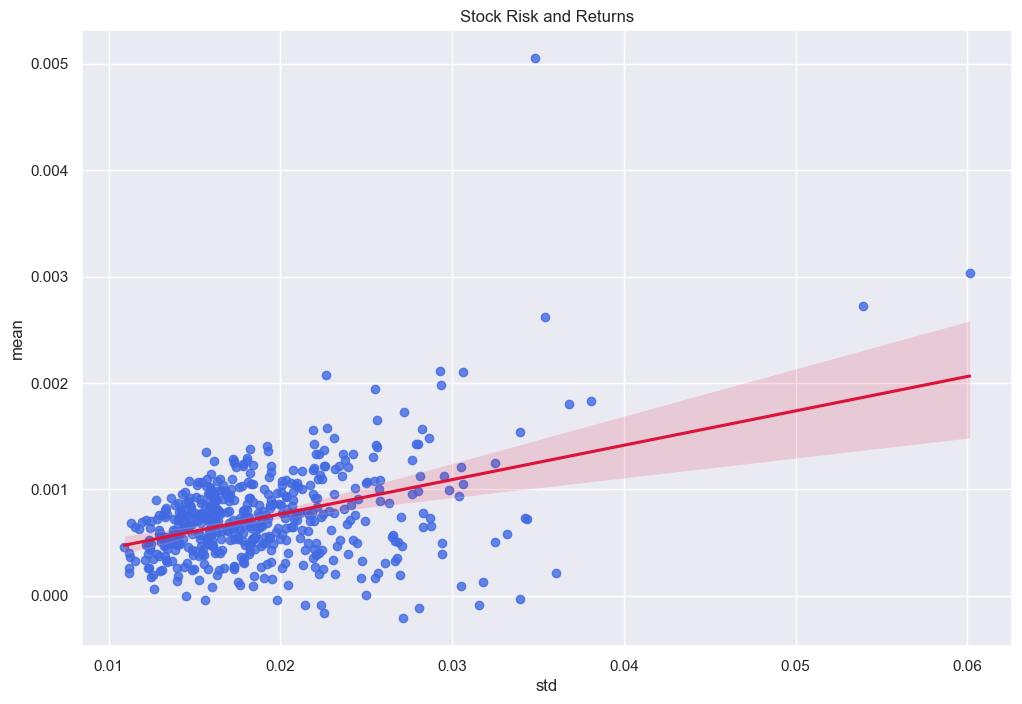

In [10]:
plt.figure(figsize = (12, 8))
sns.regplot(x = return_summaries["std"], y = return_summaries["mean"],
           scatter_kws = {"color": "royalblue"}, line_kws = {"color": "crimson"})
plt.title("Stock Risk and Returns");

We can see from the plot that there is a moderately positive relationship between the standard deviation and mean. This follows the accepted notion that risk (std) and return (mean) have a linear relationship. Additioanlly, the returns seem to be following a random walk as usual. The vast majority of return values are close to zero since, the returns would be randomly fluctuating between positive and negative, causing them to essentially "cancel out".

An individual stock may be random, but perhaps we can find a set of stocks to limit this randomness. As can be seen below, even four of the largest technology companies have fairly different returns profiles.

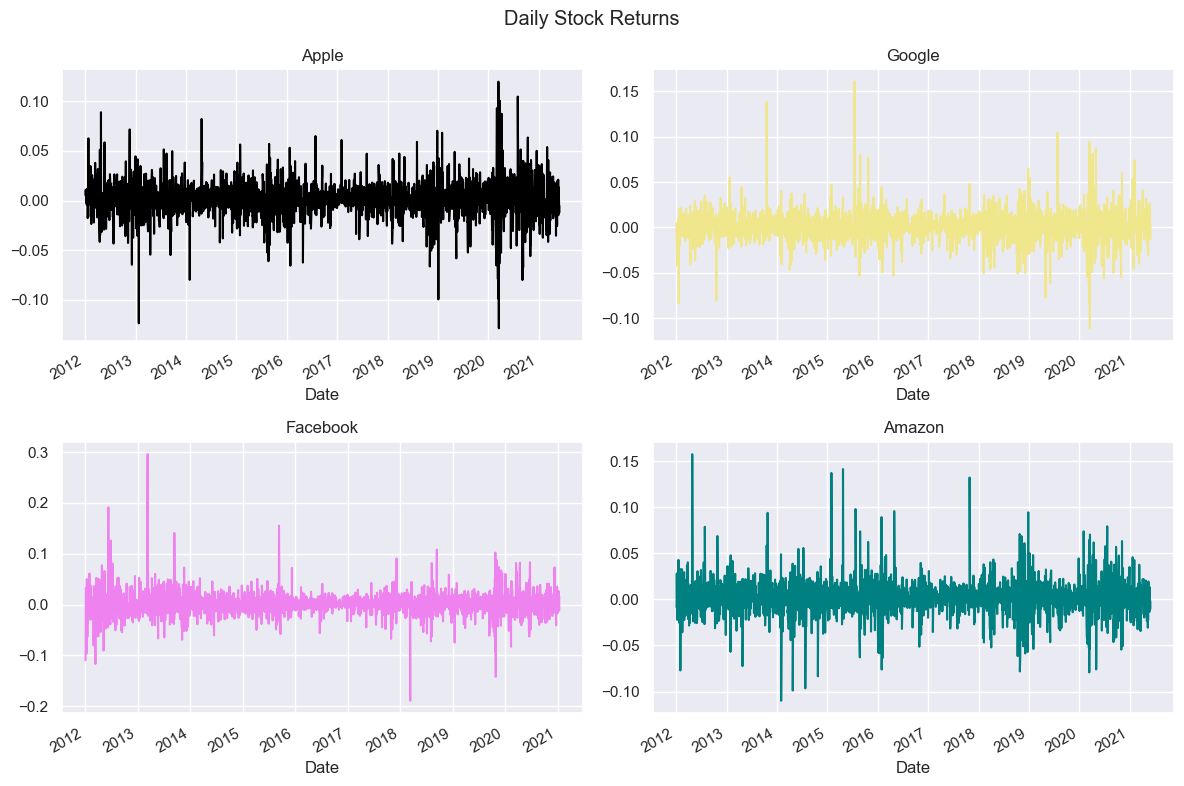

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
df_returns["AAPL"].plot(ax = axes[0, 0], color = "black", title = "Apple")
df_returns["GOOG"].plot(ax = axes[0, 1], color = "khaki", title = "Google")
df_returns["FB"].plot(ax = axes[1, 0], color = "violet", title = "Facebook")
df_returns["AMZN"].plot(ax = axes[1, 1], color = "teal", title = "Amazon")
plt.suptitle("Daily Stock Returns")
plt.tight_layout()

## Exploring ESG Data

In [12]:
# Importing ESG Risk Data for S&P500 Companies from Yahoo Finance
df_esg = pd.read_csv("SP500_ESG_Data.csv")
df_esg.head()

,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ABMD,Abiomed,NaN,NaN,NaN,NaN,NaN,NaN
4,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05


In [13]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  505 non-null    object 
 1   Security                505 non-null    object 
 2   ESG Risk Score          452 non-null    float64
 3   Environment Risk Score  452 non-null    float64
 4   Social Risk Score       452 non-null    float64
 5   Governance Risk Score   452 non-null    float64
 6   Controversy Level       452 non-null    float64
 7   Data Date               452 non-null    object 
dtypes: float64(5), object(3)
memory usage: 31.7+ KB


Here, we have ESG risk data for each of the 505 stocks in the S&P500 to stay consistent with the previous price and returns data. Not all stocks had this data available though, as there are 53 rows with missing values. This is a similar amount to the number of stocks that did not have the full price data, so again this needs to be taken into consideration when performing analysis. Since there is no appropriate way to fill in these values, the best course of action is to just remove them. This should not be detrimental to our exploration as there is still ample data left over. The main focus will be on the "ESG Risk Score" as this is an aggregate of the three main components.

However, there is one major limitation in the sense that this data is only cross-sectional in nature. Even though the data is for multiple companies, it is only availble at one specific period of time (the "Data Date" column) and is found in May 2021 for all. If we want to create a strategy using this ESG data, we will have to take the assumtpion that ESG risk is not time varying.

In [14]:
# dropping missing values
df_esg.dropna(subset=['ESG Risk Score'], inplace=True)
df_esg.reset_index(inplace=True, drop=True)

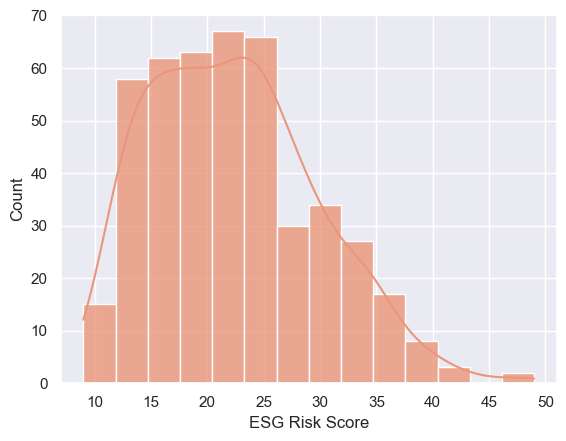

In [15]:
sns.histplot(data = df_esg, x = "ESG Risk Score", kde = True, color = "darksalmon", alpha = 0.8);

Despite the ESG risk score being on a scale of 0-100, not a single company has a score beyond 50. Most firms seem to be placed around the 15-25 mark. These relatively lower numbers in regards to the scale make sense as these are some of the largest companies in the US, so one would not expect them to have very high risk in the mentioned areas.

## Relationships Between ESG, Returns, and Risk

In [16]:
# Getting ESG, returns, and risk data into a single dataframe
df_all = return_summaries.reset_index()
df_all.columns = ["Ticker", "Expected Return", "Total Risk"]
df_all = df_all.merge(df_esg, left_on = "Ticker", right_on = "Symbol")
df_all.drop(["Symbol", "Data Date"], axis = 1, inplace = True)
df_all.head()

,Ticker,Expected Return,Total Risk,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level
0,MMM,0.000464,0.013227,3M Company,35.0,13.2,13.6,8.1,3.0
1,ABT,0.000716,0.014076,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0
2,ABBV,0.000711,0.017848,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0
3,ACN,0.000812,0.014441,Accenture,11.0,0.6,5.0,5.8,2.0
4,ATVI,0.001078,0.020098,Activision Blizzard,16.0,0.2,9.8,6.2,2.0


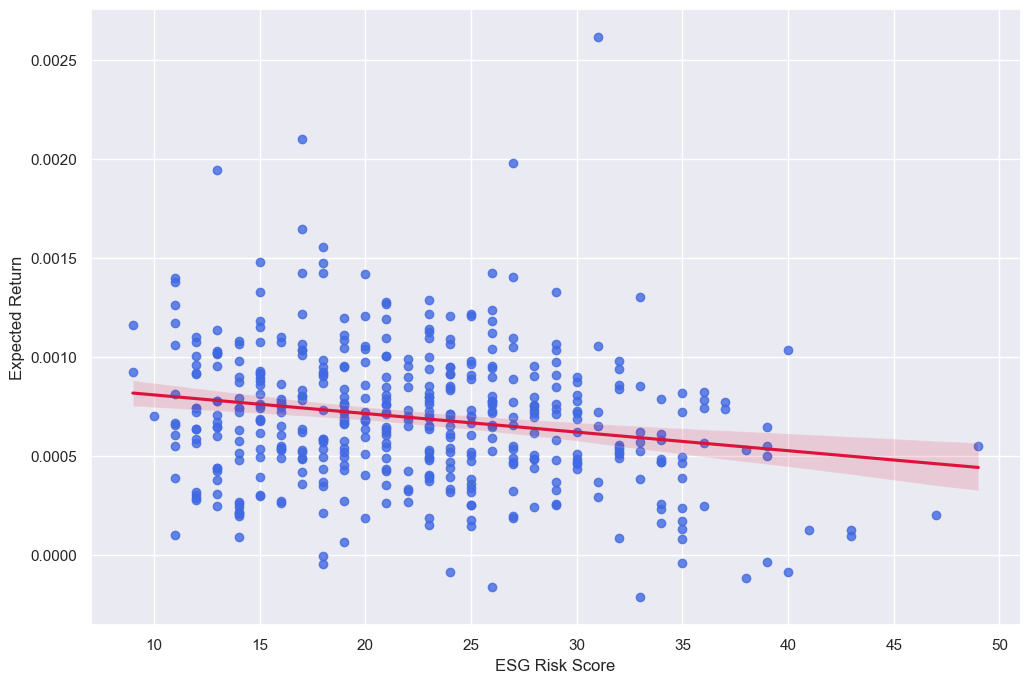

In [17]:
plt.figure(figsize = (12, 8))
sns.regplot(x = df_all["ESG Risk Score"], y = df_all["Expected Return"],
           scatter_kws = {"color": "royalblue"}, line_kws = {"color": "crimson"});

It seems like there is a slight inverse relationship between expected a company's expected return on the market and their ESG risk score. Therefore, on average, firms with higher ESG risk will expect lower returns on their stock. This seems plausible as investors may not want to back securities of a higher risk in such a valued and relevant domain. This however, does not follow the same relationship as expected returns with total risk, as we saw before. As a result, let's see how total risk and ESG risk are related.

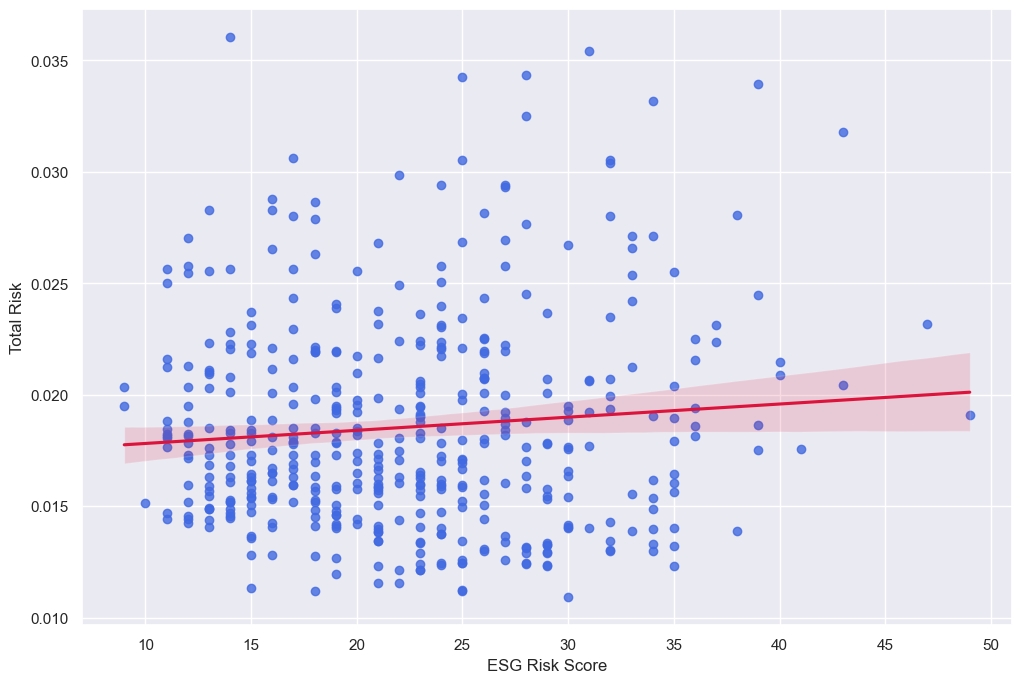

In [18]:
plt.figure(figsize = (12, 8))
sns.regplot(x = df_all["ESG Risk Score"], y = df_all["Total Risk"],
            scatter_kws = {"color": "royalblue"}, line_kws = {"color": "crimson"});

Now, ESG risk and total risk seem to have a very slight proportional relationship. Overall, the relationship seems fairly ambiguous. Let's check out the various correlation coffecients.

In [19]:
df_all.corr(numeric_only = True).round(3)

,Expected Return,Total Risk,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level
Expected Return,1.000,0.246,-0.200,-0.265,-0.013,0.015,-0.110
Total Risk,0.246,1.000,0.092,0.105,0.001,0.042,-0.033
ESG Risk Score,-0.200,0.092,1.000,0.694,0.652,0.426,0.286
Environment Risk Score,-0.265,0.105,0.694,1.000,-0.012,-0.148,0.062
Social Risk Score,-0.013,0.001,0.652,-0.012,1.000,0.414,0.345
Governance Risk Score,0.015,0.042,0.426,-0.148,0.414,1.000,0.188
Controversy Level,-0.110,-0.033,0.286,0.062,0.345,0.188,1.000


As we found above, there is some negative correlation between ESG risk and expected return (0.2), and a weak positive correlation between ESG risk and total risk (0.09). Expected return and total risk have a stronger correlation at 0.25. Interestingly enough, the risk that had the most averse relationship with expected returns was that of the environment (-0.27).

Let's now check the statistical significance of the two relationships we explored.

In [20]:
# Expected Returns and ESG Risk
stats.pearsonr(df_all["Expected Return"], df_all["ESG Risk Score"])

PearsonRResult(statistic=-0.19971672492940185, pvalue=1.8904897940404795e-05)

The p-value of the above correlation is close to zero, so this relationship is statiscally significant.

In [21]:
# Total Risk and ESG Risk
stats.pearsonr(df_all["Total Risk"], df_all["ESG Risk Score"])

PearsonRResult(statistic=0.09245677237658301, pvalue=0.04948089476053563)

This p-value is just under 0.05, so again, this relationship is statitically significant at the 95% level.

## ESG Portfolio Design

In [22]:
# Splitting Distribution of ESG Risk Score into Quartiles
qrt_lbl = ["PQ" + str(i) for i in range(1, 5)]

# Placing Security into Respective Quartiles
df_esg["ESG Quartile Rank"] = df_all["ESG Risk Score"].transform(lambda x: pd.qcut(x, 4, labels = qrt_lbl))
df_esg.tail()

,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date,ESG Quartile Rank
447,XLNX,Xilinx,23.0,9.6,5.9,7.8,1.0,2021-05,PQ3
448,XYL,Xylem Inc.,16.0,3.5,7.8,5.1,2.0,2021-05,PQ1
449,YUM,Yum! Brands Inc,21.0,4.0,12.9,4.4,3.0,2021-05,PQ2
450,ZBH,Zimmer Biomet,34.0,4.8,18.9,10.5,2.0,2021-05,PQ4
451,ZTS,Zoetis,19.0,1.5,8.3,9.3,1.0,2021-05,PQ2


In [23]:
df_esg["ESG Quartile Rank"].value_counts()

PQ2    120
PQ1    115
PQ3    112
PQ4    105
Name: ESG Quartile Rank, dtype: int64

The distribution of securities across quartiles is fairly even, so the nature of diversification should not affect the difference in returns between each quartile.

In [24]:
# Merging ESG and Returns Data
df_returns = df_returns.unstack().reset_index()
df_returns.columns = ["Ticker", "Date", "Returns"]
df_esg_returns = df_returns.merge(df_esg, left_on = "Ticker", right_on = "Symbol")
df_esg_returns.tail()

,Ticker,Date,Returns,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date,ESG Quartile Rank
1069879,ZTS,2021-05-24 16:00:00,NaN,ZTS,Zoetis,19.0,1.5,8.3,9.3,1.0,2021-05,PQ2
1069880,ZTS,2021-05-25 16:00:00,NaN,ZTS,Zoetis,19.0,1.5,8.3,9.3,1.0,2021-05,PQ2
1069881,ZTS,2021-05-26 16:00:00,NaN,ZTS,Zoetis,19.0,1.5,8.3,9.3,1.0,2021-05,PQ2
1069882,ZTS,2021-05-27 16:00:00,NaN,ZTS,Zoetis,19.0,1.5,8.3,9.3,1.0,2021-05,PQ2
1069883,ZTS,2021-05-28 16:00:00,NaN,ZTS,Zoetis,19.0,1.5,8.3,9.3,1.0,2021-05,PQ2


In [25]:
# Returns by Quartile
quartile_returns = df_esg_returns.groupby(["Date", "ESG Quartile Rank"])["Returns"].mean().unstack()
quartile_returns.dropna(inplace = True)
quartile_returns.head()

ESG Quartile Rank,PQ1,PQ2,PQ3,PQ4
Date,,,,
2012-01-04 16:00:00,-0.003278,0.000543,-0.004115,0.002247
2012-01-05 16:00:00,0.007174,0.006893,0.004740,0.003689
2012-01-06 16:00:00,0.000907,0.000880,-0.000314,-0.002650
2012-01-09 16:00:00,0.003066,0.005229,0.003968,0.002681
2012-01-10 16:00:00,0.014791,0.014712,0.015277,0.010414


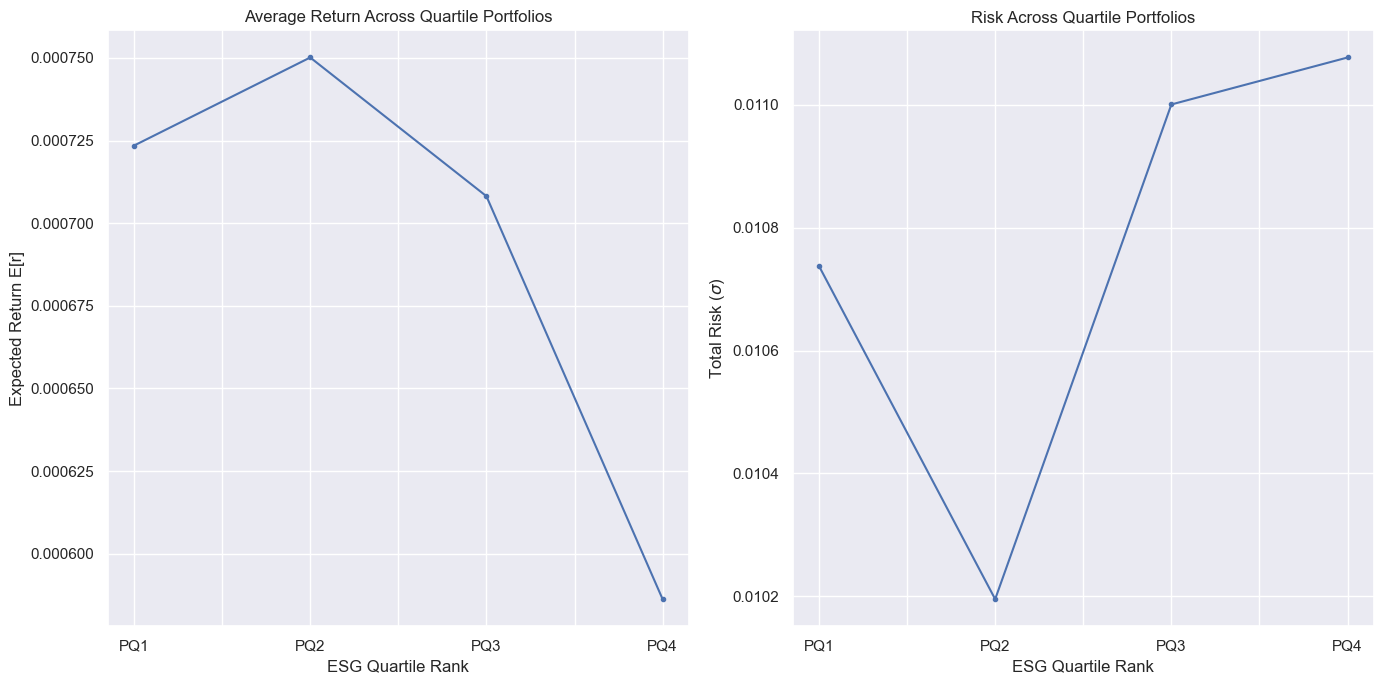

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))
quartile_returns.mean().plot(ax = axes[0], title = "Average Return Across Quartile Portfolios", marker = ".",
                            ylabel = "Expected Return E[r]")
quartile_returns.std().plot(ax=axes[1], title="Risk Across Quartile Portfolios", marker=".",
                            ylabel="Total Risk ($\sigma$)")
plt.tight_layout()

Generally, there seems to be a downward trending line for ESG quartile ranks and the expected return. This means that overall, portfolios of securities with higher ESG risk scores will have lower returns than those that have lower ESG risk scores. The exception to this is the portfolio of second quartile companies. These seem to have the highest return, although after this, the trend goes back down. In a similar vain, there seems to an upward trending line for ESG quartile ranks and total risk, with PQ2 being the exception. This means that generally, portfolios of higher ESG risk will occupy higher total risk. Both of these findings are consistent with the relationships found earlier with individual securities. 

The portfolio of PQ2 seems to be performing the best, considering it is offering the greatest returns with the lowest risk. PQ4 on the other hand, is not very desirable since it offers the least return with the greatest risk. Now let's get a look of how these portfolios perform over time.

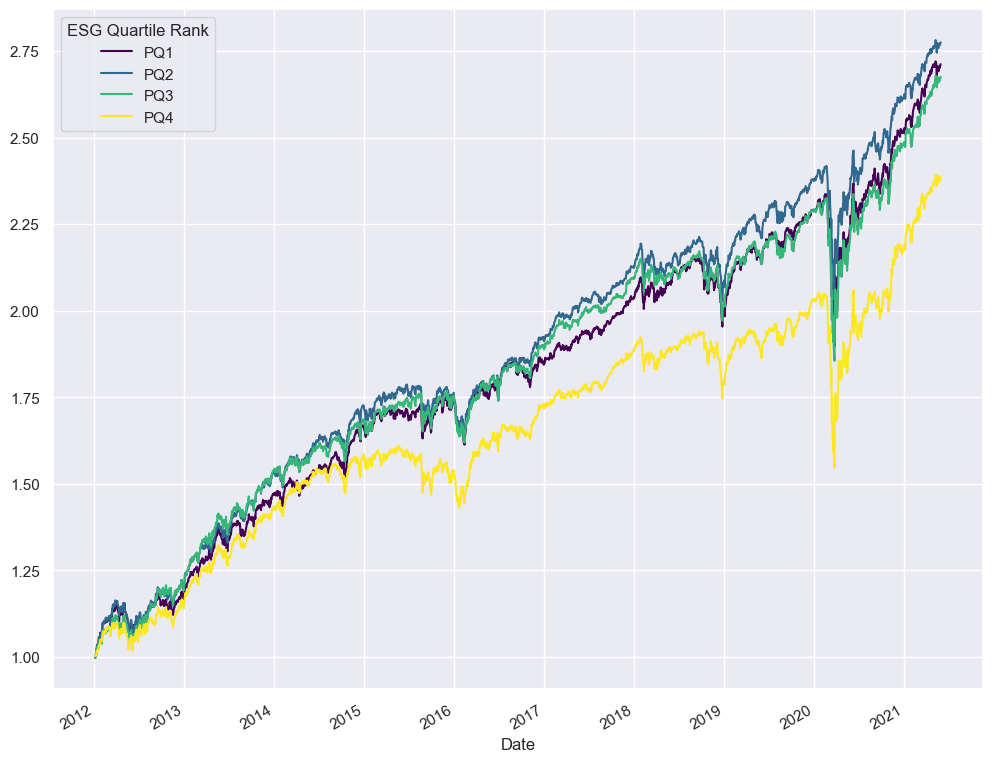

In [27]:
# Cumlative Returns
cum_returns = 1 + quartile_returns.cumsum() # taking 1 unit invesment at start of time-period
cum_returns.plot(figsize = (12, 10), cmap = "viridis");

We can see that by far, PQ4 has the worst performance. The other three portfolios seem relatively similar over the almost 10-year period, however, it does look like PQ2 performs the best, just like in the previous two metrics. There is one big dip consistent with all portfolios during the start/mid of 2020, which would have been due to COVID-19 and lockdown restrictions- leading to a market crash.

## Hypothesis Testing I

From the analysis above, it is likley that the returns of firms with lower ESG risk are statistically greater than the returns of firms with higher ESG risk. Let's check this hypothesis.

In [28]:
# Testing with bottom and top 25%
stats.ttest_rel(quartile_returns["PQ1"], quartile_returns["PQ4"], nan_policy = "omit", alternative = "greater")

TtestResult(statistic=1.588954065767305, pvalue=0.05610221426722605, df=2365)

Although this relationship is not technically significant at the 95% level, a p-value of 0.056 is still relatively meaningful, especially considering the limitations in data that were present. We will not necessarily reject the null hypothesis, but will continue to explore the findings. Moreover, if we conduct the same test for PQ1 and PQ2 against PQ4 below, we see there are clear statisticlly significant results.

In [29]:
stats.ttest_rel(quartile_returns["PQ2"], quartile_returns["PQ4"], nan_policy = "omit", alternative = "greater")

TtestResult(statistic=1.989188222154317, pvalue=0.02339772809571685, df=2365)

In [30]:
stats.ttest_rel(quartile_returns["PQ3"], quartile_returns["PQ4"], nan_policy = "omit", alternative = "greater")

TtestResult(statistic=1.8564449328204136, pvalue=0.03175722215208439, df=2365)

We can see that there isn't a monotnic relationship as such between ESG risk and expected returns- in the way the as portfolios gradually increase in ESG risk, they do not strictly decrease in returns. However, there is defintely something there in regards to avoiding portfolios consisting of the absolutely highest ESG risk.

## Hypothesis Testing II

Now, let's take some steps to test another hypothesis. In this, we will investigate whether a long short ESG risk strategy can yield returns above the market. In this context, a long short stratgey will entail going long on low ESG risk securities, while shorting high ESG risk securities. To test this, we first need to get the market data. In addition, since there is not much free data available on US Bonds to take as the risk free rate, we will assume an average 10-year annual rate of 2%.

In [31]:
# Importing S&P 500 Market Index Prices from Yahoo Finance
sp500_price = pd.read_csv("SP500_Market_Price.csv")
sp500_price.isna().sum()

Date     0
Close    0
dtype: int64

In [32]:
# Calculating Returns on Index
sp500_price["Market Return"] = sp500_price["Close"].pct_change()
sp500_price.dropna(inplace = True) # dropping first value as it will be NaN
sp500_price.reset_index(inplace = True, drop = True) # starting from index 0
sp500_price.head()

,Date,Close,Market Return
0,04/01/2012,1277.30,0.000188
1,05/01/2012,1281.06,0.002944
2,06/01/2012,1277.81,-0.002537
3,09/01/2012,1280.70,0.002262
4,10/01/2012,1292.08,0.008886


In [33]:
# Saving quartile returns data into CSV
quartile_returns.to_csv("temp.csv")

# Importing data back
capm_data = pd.read_csv("temp.csv")

# removing temp file
import os
os.remove("temp.csv")

# Adding S&P 500 Returns to data
capm_data["Market"] = sp500_price["Market Return"]

# Average Daily Risk-Free Rate (around 250 trading days in a year)
capm_data["Risk Free"] = 0.02 / 250

# Excess Market Return
capm_data["Excess Market"] = capm_data["Market"] - capm_data["Risk Free"]

# Difference Between Low and High ESG Risk Returns (PQ1 minus PQ4)
capm_data["Low - High"] = capm_data["PQ1"] - capm_data["PQ4"]
capm_data.head()

,Date,PQ1,PQ2,PQ3,PQ4,Market,Risk Free,Excess Market,Low - High
0,2012-01-04 16:00:00,-0.003278,0.000543,-0.004115,0.002247,0.000188,0.00008,0.000108,-0.005526
1,2012-01-05 16:00:00,0.007174,0.006893,0.004740,0.003689,0.002944,0.00008,0.002864,0.003485
2,2012-01-06 16:00:00,0.000907,0.000880,-0.000314,-0.002650,-0.002537,0.00008,-0.002617,0.003556
3,2012-01-09 16:00:00,0.003066,0.005229,0.003968,0.002681,0.002262,0.00008,0.002182,0.000385
4,2012-01-10 16:00:00,0.014791,0.014712,0.015277,0.010414,0.008886,0.00008,0.008806,0.004378


To test the this hypthesis, we will run an OLS linear regression on the "Excess Market" and "Low - High" columns based on the CAPM. In this, the "Low - High" column will be taken as the dependent variable and the "Excess Market" column will be taken as the independent variable.

In [34]:
import statsmodels.api as sm
y = capm_data["Low - High"]
X = capm_data["Excess Market"]
X = sm.add_constant(X)

In [35]:
ols = sm.OLS(y, X)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Low - High   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0001694
Date:                Sun, 17 Sep 2023   Prob (F-statistic):              0.990
Time:                        11:46:49   Log-Likelihood:                 9590.8
No. Observations:                2366   AIC:                        -1.918e+04
Df Residuals:                    2364   BIC:                        -1.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001   8.65e-05      1.586      0.113   -3.24e-05       0.000
Excess Market     0.0001      0.008      0.013      0.990      -0.016       0.016
==============================================================================
Omnibus:                      255.258   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2174.499
Skew:                           0.054   Prob(JB):                         0.00
Kurtosis:                       7.695   Cond. No.                         95.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R^2 value for this regression is 0, but this is not of concern to us. In this model, the intercept term (const) represents the alpha- the returns above that of the market. This term is very small and close to 0, however, this data is for daily returns. Let's check the annualized version of this value.

In [36]:
ols_result.params[0] * 250

0.03429977827873093

If we were to create a long short strategy using ESG risk, we could expect to receive a return that is around 3.43% higher than that of the market index (S&P500). Note, that the constant term from the OLS has a p-value of 0.113, which means this result is not statistically significant at the 90% level, let alone the 95% level. Even then, this can still be considered a relatively meaningful result.

Yet again, it is likely that these results are even better for PQ2 when compared to PQ4- where we can say to go long in low-mid ESG risk stocks, while shorting high ESG risk stocks. Let's give this a quick look.

In [37]:
# difference Between Low and High ESG Risk Returns 2 (PQ2 minus PQ4)
capm_data["Low2 - High"] = capm_data["PQ2"] - capm_data["PQ4"]
y2 = capm_data["Low2 - High"]
ols2 = sm.OLS(y2, X)
ols_result2 = ols2.fit()
ols_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Low2 - High   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.021
Date:                Sun, 17 Sep 2023   Prob (F-statistic):            0.00466
Time:                        11:46:49   Log-Likelihood:                 9706.3
No. Observations:                2366   AIC:                        -1.941e+04
Df Residuals:                    2364   BIC:                        -1.940e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002   8.24e-05      2.120      0.034    1.31e-05       0.000
Excess Market    -0.0223      0.008     -2.832      0.005      -0.038      -0.007
==============================================================================
Omnibus:                      301.877   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3241.607
Skew:                          -0.126   Prob(JB):                         0.00
Kurtosis:                       8.729   Cond. No.                         95.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
ols_result2.params[0] * 250

0.04364645040510483

As figured, the alpha term for this result is statistically significant at the 95% level and it provided even higher abnormal returns as compared to the market index, at around 4.37%. What is even more impressive with this portfolio is that it has managed to conjure a negative beta value. This comes in the form of the "Excess Market" coefficient, which has a value of -0.0223. With this, the portfolio can also be potentially offsetting some of the market risk. The correlation below also confirms this relationship.

In [39]:
np.corrcoef(capm_data["Low2 - High"], capm_data["Excess Market"])[0][1]

-0.0581525071345693

## Conclusion

Through the course of our analysis, we have found a number of interesting things.

- ESG Risk and Expected Returns have a negative correlation
- ESG Risk and Total Risk have a positve correlation
- The portfolio of second quartile ESG Risk stocks had the highest average returns and lowest Total Risk
- The portfolio of fourth quartile ESG Risk stocks had the lowest average returns and highest Total Risk.
- The cumulative returns of the fourth quartile ESG Risk stocks was significantly less than the other three.
- The hypothesis of firms with lower ESG Risk having statistically higher returns than those of higher ESG Risk was not untrue.
- The hypothesis that a long/short ESG Risk strategy can provide returns above the market has potential and could do so at 3-4%.


We have seen throughout that PQ2 performed the best in pretty much every metric and test, while PQ4 was far and away the worst. The reasons as to why PQ4 has performed so poorly compared to the rest has been dicussed before, however it is intruiging to see PQ2's consistency. A possible explanation for this may be that firms in PQ1 have the notion of "playing it safe", while firms at PQ2 strike a good balance between controversy and innovation. As a result, a strategy consisting of going long on low-mid ESG risk securities, while shorting high ESG risk securities is likely to have the best returns, while also minimizing risk. Creating an algorithmic trading system could be a fruitful next step to implementing this in the markets.